<a href="https://colab.research.google.com/github/VanTam23/AI/blob/main/kiemtra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.layers import Dense,Flatten, Dropout
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

In [25]:
train = ImageDataGenerator(rescale = 1./255,
                           width_shift_range=0.2,
                           rotation_range=40,
                           shear_range=0.2,
                           height_shift_range=0.2,
                           zoom_range=0.2,
                           fill_mode='nearest',
                           horizontal_flip=True)
validation = ImageDataGenerator(rescale = 1./255)

In [26]:
train_path = '/content/drive/MyDrive/Camxuc/'

In [27]:
train_data = train.flow_from_directory('/content/drive/MyDrive/Camxuc/Training',
                                       target_size = (150,150),
                                       class_mode = 'categorical')
validation_dataset = train.flow_from_directory('/content/drive/MyDrive/Camxuc/Val',
                                       target_size = (150,150),
                                       class_mode = 'categorical')


Found 81 images belonging to 4 classes.
Found 33 images belonging to 4 classes.


In [28]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 43808)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [29]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_data,epochs=20,batch_size=128,validation_data=validation_dataset,verbose=1)

Epoch 1/20
3/3 [==============================] - 18s 8s/step - loss: 10.9704 - accuracy: 0.1605 - val_loss: 13.1477 - val_accuracy: 0.4242
Epoch 2/20
3/3 [==============================] - 3s 956ms/step - loss: 11.5140 - accuracy: 0.2346 - val_loss: 2.0947 - val_accuracy: 0.1212
Epoch 3/20
3/3 [==============================] - 3s 1s/step - loss: 2.7135 - accuracy: 0.3210 - val_loss: 2.3408 - val_accuracy: 0.1818
Epoch 4/20
3/3 [==============================] - 3s 1s/step - loss: 2.3664 - accuracy: 0.2469 - val_loss: 1.8369 - val_accuracy: 0.2121
Epoch 5/20
3/3 [==============================] - 3s 939ms/step - loss: 1.6193 - accuracy: 0.2222 - val_loss: 1.3865 - val_accuracy: 0.0909
Epoch 6/20
3/3 [==============================] - 3s 958ms/step - loss: 1.4134 - accuracy: 0.2222 - val_loss: 1.3295 - val_accuracy: 0.3636
Epoch 7/20
3/3 [==============================] - 3s 1s/step - loss: 1.3618 - accuracy: 0.4198 - val_loss: 1.3366 - val_accuracy: 0.5758
Epoch 8/20
3/3 [============

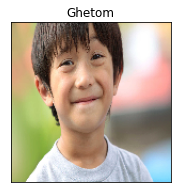

In [34]:

names = ['Ghetom','buon','hanhphuc','sohai' ]
dir = '/content/drive/MyDrive/Camxuc/test'
plt.figure(figsize=(10,10))
for i in range(1):
  plt.subplot(3,3,i + 2)
  img = load_img(dir +'/'+ str(i)+'.jpg', target_size=(150,150))
  plt.imshow(img)
  img = img_to_array(img)
  img = img.reshape(1,150,150,3)
  image = img/255.0
  plt.xticks([])
  plt.yticks([])
  plt.title(names[np.argmax(model.predict(image))])

In [ ]:
#link https://drive.google.com/drive/folders/1wpqPzh7BrhkhFXKZ1bQ54Iu607vw1Csv?usp=sharing